In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix
import pandas as pd

In [2]:
data = pd.read_excel('C:\\Users\\tim.haag\\Desktop\\EthicalAlgo\\Admission_Bias.xlsx', sheet_name = 'importb')

In [3]:
data.head()

,ID,Race,SAT,GPA,Trip_To_Europe,Graduate
0,1,Black,993.0,3.494,0,1
1,2,Black,984.0,3.528,1,1
2,3,Black,1065.0,3.902,0,1
3,4,Black,930.0,3.664,0,1
4,5,Black,984.0,4.072,0,1


In [4]:
data.describe()

,ID,SAT,GPA,Trip_To_Europe,Graduate
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,913.515000,3.557160,2.045000,0.500000
std,57.879185,115.743347,0.437455,1.765947,0.501255
min,1.000000,720.000000,2.720000,0.000000,0.000000
25%,50.750000,803.250000,3.196000,1.000000,0.000000
50%,100.500000,918.000000,3.549000,2.000000,0.500000
75%,150.250000,1003.500000,3.868000,3.000000,1.000000
max,200.000000,1110.000000,4.480000,6.000000,1.000000


In [5]:
print('White Student Statistics:'), display(data.loc[(data.Race == 'White') & (data.Graduate == 1)].describe())

White Student Statistics:


,ID,SAT,GPA,Trip_To_Europe,Graduate
count,95.000000,95.000000,95.000000,95.000000,95.0
mean,58.000000,934.073684,3.758484,2.884211,1.0
std,27.568098,112.951151,0.396231,1.988601,0.0
min,11.000000,750.000000,3.120000,0.000000,1.0
25%,34.500000,835.500000,3.460000,1.000000,1.0
50%,58.000000,939.000000,3.732000,3.000000,1.0
75%,81.500000,1042.500000,4.123000,4.500000,1.0
max,105.000000,1110.000000,4.480000,6.000000,1.0


(None, None)

In [6]:
 print('Black Student Statistics:'), display(data.loc[(data.Race == 'Black') & (data.Graduate == 1)].describe())

Black Student Statistics:


,ID,SAT,GPA,Trip_To_Europe,Graduate
count,5.000000,5.000000,5.000000,5.000000,5.0
mean,3.000000,991.200000,3.732000,0.200000,1.0
std,1.581139,48.215143,0.248689,0.447214,0.0
min,1.000000,930.000000,3.494000,0.000000,1.0
25%,2.000000,984.000000,3.528000,0.000000,1.0
50%,3.000000,984.000000,3.664000,0.000000,1.0
75%,4.000000,993.000000,3.902000,0.000000,1.0
max,5.000000,1065.000000,4.072000,1.000000,1.0


(None, None)

In [7]:
y = data.Graduate
feature_columns = ['SAT', 'GPA', 'Trip_To_Europe']
X = data[feature_columns]

In [8]:
regr = linear_model.LogisticRegression()

In [9]:
regr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
y_pred = regr.predict(X)

In [11]:
# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[0.00423217 2.26130804 0.52898912]]


In [12]:
confusion_matrix(y, y_pred)

array([[77, 23],
       [23, 77]], dtype=int64)

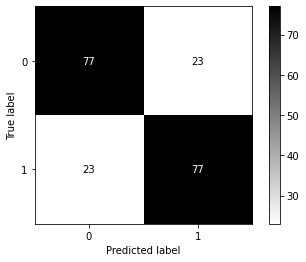

In [13]:
plot_confusion_matrix(regr, X, y, cmap= 'binary')

In [14]:
"Accuracy is: {}".format(accuracy_score(y, y_pred)), "F1 score is: {}".format(f1_score(y, y_pred))

('Accuracy is: 0.77', 'F1 score is: 0.7699999999999999')

In [15]:
data_with_pred = pd.concat([data, pd.DataFrame(y_pred, columns = ['Pred'])], axis = 1, sort = False)


In [16]:
data_with_pred.head(10)

,ID,Race,SAT,GPA,Trip_To_Europe,Graduate,Pred
0,1,Black,993.0,3.494,0,1,0
1,2,Black,984.0,3.528,1,1,0
2,3,Black,1065.0,3.902,0,1,1
3,4,Black,930.0,3.664,0,1,0
4,5,Black,984.0,4.072,0,1,1
5,6,Black,1080.0,2.754,0,0,0
6,7,Black,981.0,2.992,1,0,0
7,8,Black,1071.0,3.910,0,0,1
8,9,Black,909.0,2.754,0,0,0
9,10,Black,882.0,2.754,0,0,0


In [17]:
pivot = pd.pivot_table(data_with_pred, values='Pred', columns=['Race'], aggfunc= [np.sum, len])

In [18]:
print("Black Students Admitted: {}".format("{0:.0%}".format(pivot['sum']['Black'][0]/pivot['len']['Black'][0])))
print("White Students Admitted: {}".format("{0:.0%}".format(pivot['sum']['White'][0]/pivot['len']['White'][0])))

Black Students Admitted: 30%
White Students Admitted: 51%


In [19]:
pivot['sum']['Black'][0]

3

In [20]:
dw, db = data.loc[(data.Race == 'White')], data.loc[(data.Race == 'Black')]

In [21]:
dwy = dw.Graduate
dwX = dw[feature_columns]
dby = db.Graduate
dbX = db[feature_columns]

In [22]:
regrw = linear_model.LogisticRegression()
regrw.fit(dwX, dwy)
wy_pred = regrw.predict(dwX)
regrb = linear_model.LogisticRegression()
regrb.fit(dbX, dby)
by_pred = regrb.predict(dbX)

In [23]:
print("Accuracy is: {}".format(accuracy_score(y, y_pred)), "F1 score is: {}".format(f1_score(y, y_pred)))
print("Accuracy is: {}".format(accuracy_score(dwy, wy_pred)), "F1 score is: {}".format(f1_score(dwy, wy_pred)))
print("Accuracy is: {}".format(accuracy_score(dby, by_pred)), "F1 score is: {}".format(f1_score(dby, by_pred)))

Accuracy is: 0.77 F1 score is: 0.7699999999999999
Accuracy is: 0.7736842105263158 F1 score is: 0.7724867724867724
Accuracy is: 0.9 F1 score is: 0.9090909090909091


In [24]:
data_with_pred_w = pd.concat([dw.reset_index(drop=True), pd.DataFrame(wy_pred, columns = ['Pred']).reset_index(drop=True)], axis = 1, sort = False)
data_with_pred_b = pd.concat([db.reset_index(drop=True), pd.DataFrame(by_pred, columns = ['Pred']).reset_index(drop=True)], axis = 1, sort = False)

In [25]:
merged = pd.concat([data_with_pred_w, data_with_pred_b])

In [26]:
merged.columns

Index(['ID', 'Race', 'SAT', 'GPA', 'Trip_To_Europe', 'Graduate', 'Pred'], dtype='object')

In [27]:
print("Combined Model Accuracy is: {}".format(accuracy_score(y, y_pred)), "F1 score is: {}".format(f1_score(y, y_pred)))
print("Separate Model Accuracy is: {}".format(accuracy_score(merged.Graduate, merged.Pred)), "F1 score is: {}".format(f1_score(merged.Graduate, merged.Pred)))

Combined Model Accuracy is: 0.77 F1 score is: 0.7699999999999999
Separate Model Accuracy is: 0.78 F1 score is: 0.78
